<a href="https://colab.research.google.com/github/thap/tree-based-models/blob/master/Tree_Based_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

1.14.0


'/device:GPU:0'

In [4]:
import os
os.chdir('/content/drive/My Drive/data/tree-based models/')
print(os.getcwd())
!ls

/content/drive/My Drive/data/tree-based models
auto.csv   indian_liver_patient.csv		  wiscousin_breast_cancer.csv
bikes.csv  indian_liver_patient_preprocessed.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
auto = pd.read_csv('auto.csv')
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [7]:
auto = pd.get_dummies(auto)
auto.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [8]:
auto.head().drop('mpg', axis=1)

,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,250.0,88,3139,14.5,15.0,0,0,1
1,304.0,193,4732,18.5,20.0,0,0,1
2,91.0,60,1800,16.4,10.0,1,0,0
3,250.0,98,3525,19.0,15.0,0,0,1
4,97.0,78,2188,15.8,10.0,0,1,0


In [86]:
bike = pd.read_csv('bikes.csv')
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [10]:
cancer = pd.read_csv('wiscousin_breast_cancer.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
diagnosis = cancer.diagnosis.map({'B': 1, 'M': 0})
diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [13]:
liver = pd.read_csv('indian_liver_patient.csv')
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [14]:
liver2 = pd.read_csv('indian_liver_patient_preprocessed.csv', index_col=0)
liver2.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


# Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [0]:
Xcancer, xcancer, Ycancer, ycancer = \
train_test_split(cancer[['radius_mean', 'concave points_mean']],
                 diagnosis, test_size=0.2, random_state=1)

In [17]:
Xcancer.head()

,radius_mean,concave points_mean
408,17.99,0.088240
4,20.29,0.104300
307,9.00,0.003472
386,12.21,0.025340
404,12.34,0.020540


In [18]:
xcancer.head()

,radius_mean,concave points_mean
421,14.69,0.06300
47,13.17,0.07340
292,12.95,0.03370
186,18.31,0.05814
414,15.13,0.02739


In [19]:
Ycancer.head()

408    0
4      0
307    1
386    1
404    1
Name: diagnosis, dtype: int64

In [20]:
ycancer.head()

421    1
47     0
292    1
186    0
414    0
Name: diagnosis, dtype: int64

In [21]:

dt = DecisionTreeClassifier(max_depth=6, random_state=1)
dt.fit(Xcancer, Ycancer)
ycancer_ = dt.predict(xcancer)
print(ycancer_[:5])

[0 0 1 0 1]


In [0]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy = accuracy_score(ycancer, ycancer_)
print('Test set accuracy: {:.2f}'.format(accuracy))

Test set accuracy: 0.90


In [0]:
from sklearn.linear_model import LogisticRegression


In [0]:
from mlxtend.plotting import plot_decision_regions



In [0]:
def plot_labeled_decision_regions(X,y, models): 
    if len(models) != 2:
        raise Exception('''
        Models should be a list containing only two trained classifiers.
        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''
        X has to be a pandas DataFrame with two numerical features.
        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''
        y has to be a pandas Series corresponding to the labels.
        ''')
    fig, ax = plt.subplots(1, 2, figsize=(6.0,2.7), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


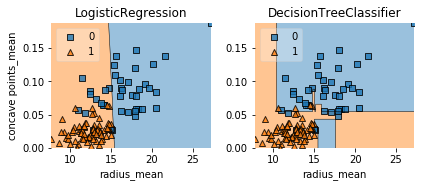

In [27]:
logr = LogisticRegression(random_state=1)
logr.fit(Xcancer, Ycancer)
clfs = [logr, dt]
plot_labeled_decision_regions(xcancer, ycancer, clfs)

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', 
                                    random_state=1)
dt_entropy.fit(Xcancer, Ycancer)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [30]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', 
                                 random_state=1)
dt_gini.fit(Xcancer, Ycancer)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [0]:
from sklearn.metrics import accuracy_score


In [32]:
ycancer_ = dt_entropy.predict(xcancer)
accuracy_entropy = accuracy_score(ycancer, ycancer_)
accuracy_entropy

0.8947368421052632

In [33]:
ycancer_ = dt_gini.predict(xcancer)
accuracy_gini = accuracy_score(ycancer, ycancer_)
accuracy_gini

0.8771929824561403

# Decision Tree Regressor

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
Xauto, xauto, Yauto, yauto = \
train_test_split(auto.drop('mpg', axis=1), auto.mpg, test_size=0.2, 
                 random_state=1)

In [36]:
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
dt.fit(Xauto, Yauto)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.13,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=3, splitter='best')

In [0]:
from sklearn.metrics import mean_squared_error as MSE

In [38]:
yauto_ = dt.predict(xauto)
rmse = MSE(yauto, yauto_) ** 0.5
rmse

4.273788320779817

In [0]:
from sklearn.linear_model import LinearRegression

In [40]:
linr = LinearRegression()
linr.fit(Xauto, Yauto)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
yauto_2 = linr.predict(xauto)
rmse2 = MSE(yauto, yauto_2) ** 0.5
rmse2

3.976186105529215

In [0]:
dt4 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=1)

In [0]:
from sklearn.model_selection import cross_val_score

In [44]:
mse_cv_scores = - cross_val_score(dt4, Xauto, Yauto, cv=10, 
                                  scoring='neg_mean_squared_error', n_jobs=-1)
rmse_cv = (mse_cv_scores.mean()) ** 0.5
rmse_cv

5.03675425396745

In [45]:
dt4.fit(Xauto, Yauto)
Yauto_ = dt4.predict(Xauto)
rmse_train = MSE(Yauto, Yauto_) ** 0.5
rmse_train

5.110036427329599

In [46]:
dt4.fit(Xauto[['displ']], Yauto)
Yauto_ = dt4.predict(Xauto[['displ']])
rmse_base = MSE(Yauto, Yauto_) ** 0.5
rmse_base

5.126650845938591

# Ensemble Classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [0]:
logr = LogisticRegression(random_state=1)
knn = KNN(n_neighbors=27)
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=1)
classifiers = [('Logistic Regression', logr), 
               ('K Nearest Neighbors', knn),
               ('Classification Tree', dt)]

In [51]:
liver2.columns

Index(['Age_std', 'Total_Bilirubin_std', 'Direct_Bilirubin_std',
       'Alkaline_Phosphotase_std', 'Alamine_Aminotransferase_std',
       'Aspartate_Aminotransferase_std', 'Total_Protiens_std', 'Albumin_std',
       'Albumin_and_Globulin_Ratio_std', 'Is_male_std', 'Liver_disease'],
      dtype='object')

In [52]:
liver2.shape

(579, 11)

In [0]:
Xliver, xliver, Yliver, yliver = \
train_test_split(liver2.drop('Liver_disease', axis=1), 
                 liver2.Liver_disease, test_size=0.3, random_state=1)

In [54]:
for clf_name, clf in classifiers:
  clf.fit(Xliver, Yliver)
  yliver_ = clf.predict(xliver)
  accuracy = accuracy_score(yliver, yliver_)
  print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.764
K Nearest Neighbors : 0.701
Classification Tree : 0.730


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
from sklearn.ensemble import VotingClassifier

In [56]:
vc = VotingClassifier(estimators=classifiers)
vc.fit(Xliver, Yliver)
yliver_ = vc.predict(xliver)
accuracy = accuracy_score(yliver, yliver_)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.770


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Bagging Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [0]:
dt = DecisionTreeClassifier(random_state=1)
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

In [61]:
bc.fit(Xliver, Yliver)
yliver_ = bc.predict(xliver)
accuracy = accuracy_score(yliver, yliver_)
print('Test set accuracy of bc: {:.2f}'.format(accuracy))

Test set accuracy of bc: 0.69


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [0]:
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, oob_score=True, 
                       random_state=1)

In [65]:
bc.fit(Xliver, Yliver)
yliver_ = bc.predict(xliver)
accuracy = accuracy_score(yliver, yliver_)
acc_oob = bc.oob_score
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(accuracy, acc_oob))

Test set accuracy: 0.718, OOB accuracy: 1.000


# Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [67]:

rf = RandomForestRegressor(n_estimators=25, random_state=1)
rf.fit(Xliver, Yliver)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [68]:
Yliver_ = rf.predict(Xliver)
rmse_train = MSE(Yliver, Yliver_) ** 0.5
yliver_ = rf.predict(xliver)
rmse_test = MSE(yliver, yliver_) ** 0.5
print('Training set RMSE: {:.2f}'.format(rmse_train))
print('Test set RMSE: {:.2f}'.format(rmse_test))

Training set RMSE: 0.17
Test set RMSE: 0.43


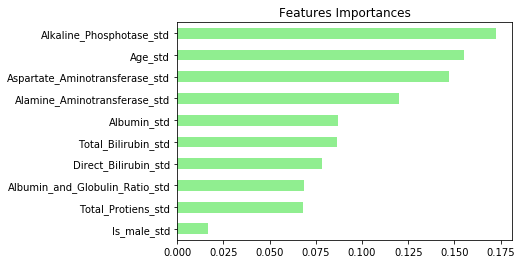

In [69]:
importances = pd.Series(data=rf.feature_importances_, 
                        index=Xliver.columns).sort_values()
importances.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

# Ada Boost Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [0]:
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

In [0]:
ada.fit(Xliver, Yliver)
yliver_proba = ada.predict_proba(xliver)[:,1]

In [85]:
Yliver_ = ada.predict(Xliver)
rmse_train = MSE(Yliver, Yliver_) ** 0.5
yliver_ = ada.predict(xliver)
rmse_test = MSE(yliver, yliver_) ** 0.5
print('Training set RMSE: {:.2f}'.format(rmse_train))
print('Test set RMSE: {:.2f}'.format(rmse_test))

Training set RMSE: 0.00
Test set RMSE: 0.56


In [0]:
from sklearn.metrics import roc_auc_score

In [77]:
roc_auc_ada = roc_auc_score(yliver, yliver_proba)
print('ROC AUC score: {:.2f}'.format(roc_auc_ada))

ROC AUC score: 0.68


# Gradient Boosting Regressor

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
Xbike, xbike, Ybike, ybike = \
train_test_split(bike.drop('cnt', axis=1), bike.cnt, test_size=0.2, 
                 random_state=1)

In [91]:
gb = GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=2)
gb.fit(Xbike, Ybike)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=2,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [93]:
Ybike_ = gb.predict(Xbike)
rmse_train = MSE(Ybike, Ybike_) ** 0.5
ybike_ = gb.predict(xbike)
rmse_test = MSE(ybike, ybike_) ** 0.5
print('Training set RMSE of gb: {:.2f}'.format(rmse_train))
print('Test set RMSE gb: {:.2f}'.format(rmse_test))

Training set RMSE: 28.36
Test set RMSE: 43.13


# Stochastic Gradient Boosting Regressor

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [98]:
sgbr = GradientBoostingRegressor(max_depth=4, subsample=0.9, max_features=0.75, 
                                 n_estimators=200, random_state=2)
sgbr.fit(Xbike, Ybike)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=0.75, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=2,
                          subsample=0.9, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [101]:
Ybike_ = sgbr.predict(Xbike)
rmse_train = MSE(Ybike, Ybike_) ** 0.5
ybike_ = sgbr.predict(xbike)
rmse_test = MSE(ybike, ybike_) ** 0.5
print('Training set RMSE of sgbr: {:.3f}'.format(rmse_train))
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Training set RMSE of sgbr: 26.269
Test set RMSE of sgbr: 44.747


# Decision Tree Hyperparameter Tuning

In [0]:
params_dt = {'max_depth': [2,3,4], 'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]}

In [0]:
from sklearn.model_selection import GridSearchCV

In [106]:
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='roc_auc', 
                       cv=5, verbose=1, n_jobs=-1)
grid_dt.fit(Xliver, Yliver)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
             pre_dispat

In [0]:
from sklearn.metrics import roc_auc_score

In [114]:
best_model = grid_dt.best_estimator_
yliver_proba = best_model.predict_proba(xliver)[:,1]
roc_auc_dt = roc_auc_score(yliver, yliver_proba)
print('Test set ROC AUC score: {:.3f}'.format(roc_auc_dt))

Test set ROC AUC score: 0.707


# Random Forest Hyperparameter Tuning

In [0]:
params_rf = {'n_estimators': [100, 350, 500], 
             'max_features': ['log2', 'auto', 'sqrt'], 
             'min_samples_leaf': [2, 10, 30]}

In [0]:
from sklearn.model_selection import GridSearchCV

In [116]:
grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, 
                       scoring='neg_mean_squared_error', 
                       cv=3, verbose=1, n_jobs=-1)
grid_rf.fit(Xbike, Ybike)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   27.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=25, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt']

In [117]:
best_model = grid_rf.best_estimator_
Ybike_ = best_model.predict(Xbike)
rmse_train = MSE(Ybike, Ybike_) ** 0.5
ybike_ = best_model.predict(xbike)
rmse_test = MSE(ybike, ybike_) ** 0.5
print('Training set RMS score of Random Forest: {:.3f}'.format(rmse_train))
print('Test set RMSE score of Random Forest: {:.3f}'.format(rmse_test))

Training set RMS score of Random Forest: 29.665
Test set RMSE score of Random Forest: 51.779
